In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:\\students_data.csv", encoding='Windows-1252')

断点左侧决定系数 (R^2): 0.002646687433569328
断点左侧均方误差 (MSE): 4.344239583808378
断点右侧决定系数 (R^2): 0.022499654982339634
断点右侧均方误差 (MSE): 4.277187018045123


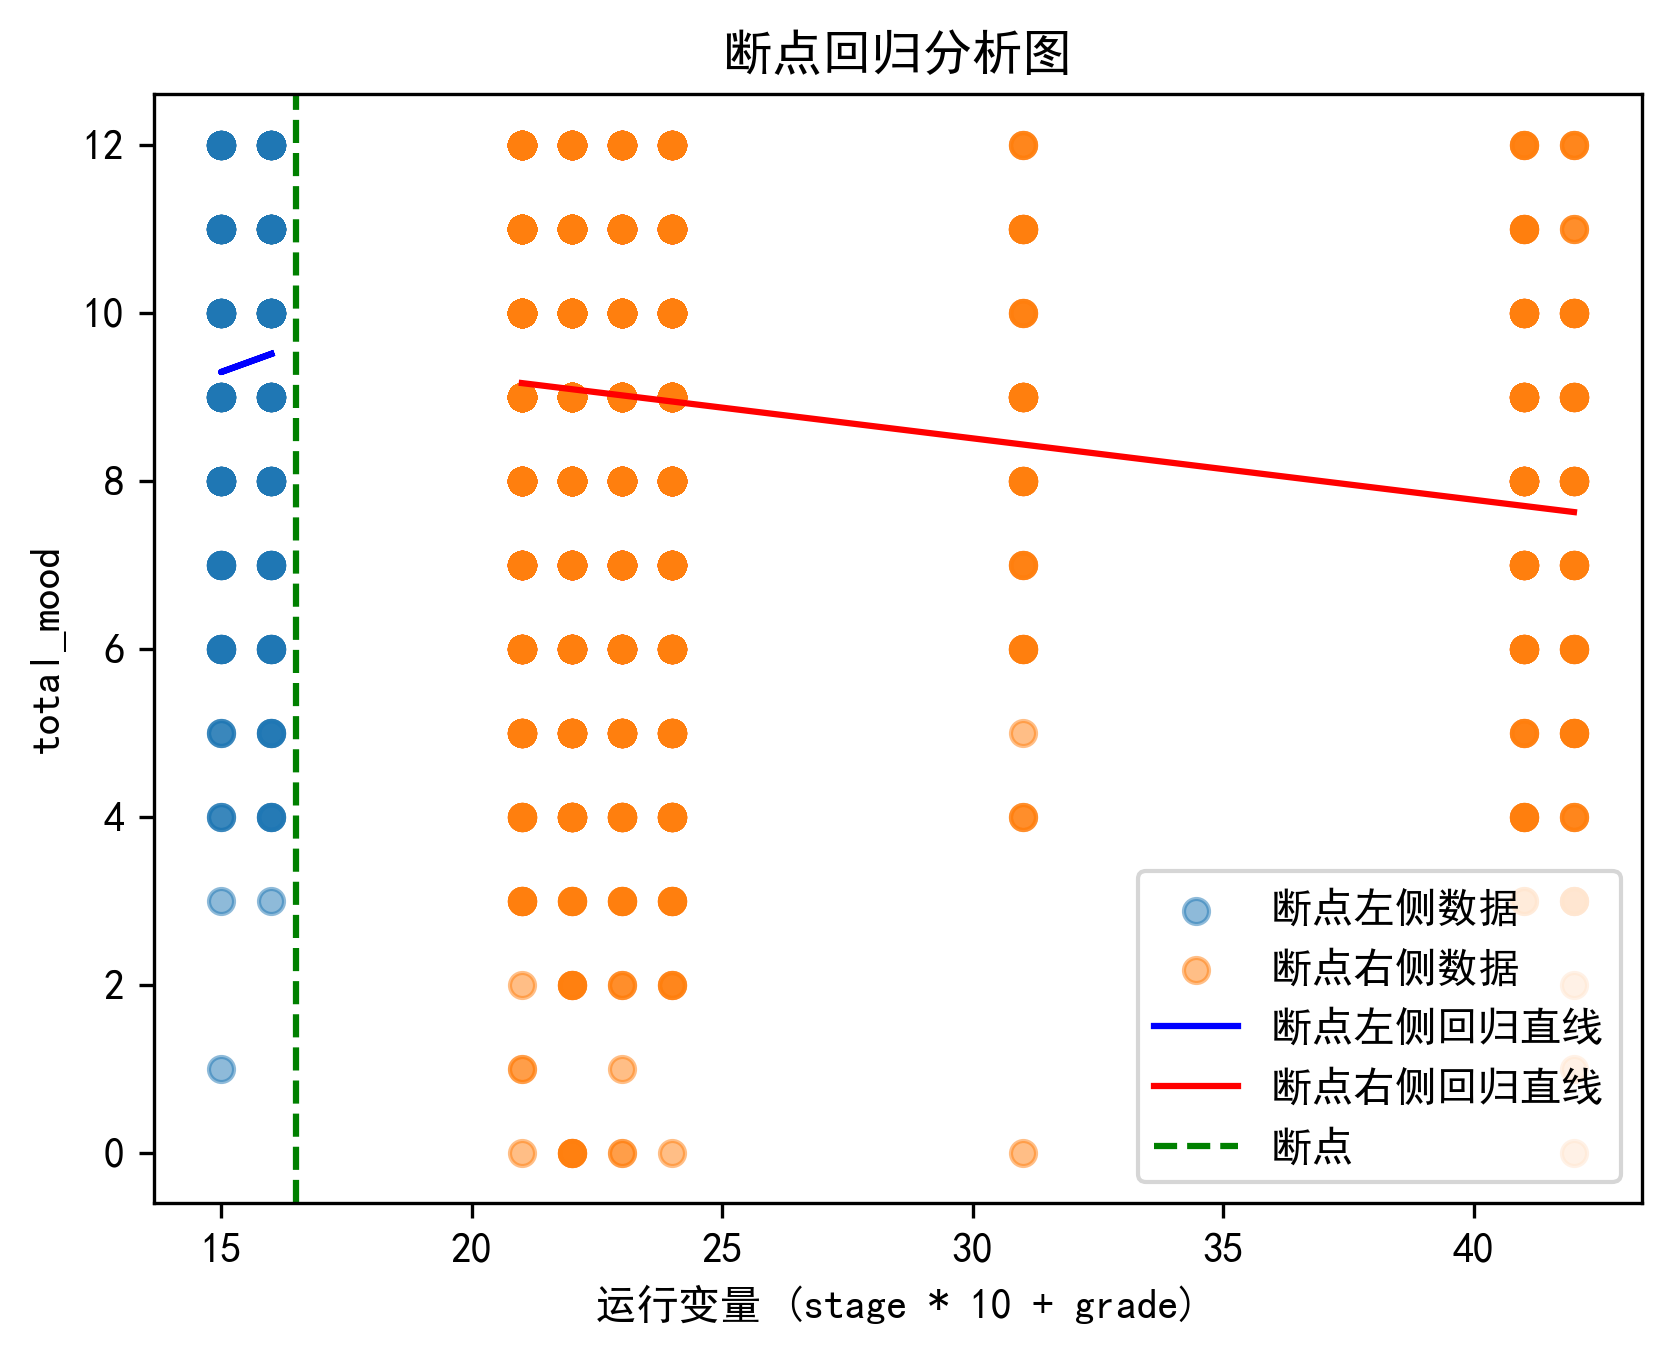

断点左侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00        0.05
total_mood                    0.05        1.00
断点右侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.15
total_mood                   -0.15        1.00


In [17]:
# 小升初
# 计算因变量
df['total_mood'] = df['moodfun'] + df['moodalone'] + df['moodgeneral']

# 删除 total_mood 列中含有缺失值的行
df = df.dropna(subset=['total_mood'])

# 创建一个断点变量，以 (1, 6) 和 (2, 1) 为断点
df['breakpoint'] = ((df['stage'] == 1) & (df['grade'] == 6)) | ((df['stage'] == 2) & (df['grade'] == 1))
df['running_variable'] = df['stage'] * 10 + df['grade']
threshold = 16.5  # 断点在 (1, 6) 和 (2, 1) 中间

# 划分断点两侧的数据
left_data = df[df['running_variable'] < threshold]
right_data = df[df['running_variable'] >= threshold]

# 分别对断点两侧的数据进行线性回归
X_left = left_data[['running_variable']]
y_left = left_data['total_mood']
model_left = LinearRegression()
model_left.fit(X_left, y_left)
y_pred_left = model_left.predict(X_left)

X_right = right_data[['running_variable']]
y_right = right_data['total_mood']
model_right = LinearRegression()
model_right.fit(X_right, y_right)
y_pred_right = model_right.predict(X_right)

# 计算回归分析指标
r2_left = r2_score(y_left, y_pred_left)
mse_left = mean_squared_error(y_left, y_pred_left)
r2_right = r2_score(y_right, y_pred_right)
mse_right = mean_squared_error(y_right, y_pred_right)

print('断点左侧决定系数 (R^2):', r2_left)
print('断点左侧均方误差 (MSE):', mse_left)
print('断点右侧决定系数 (R^2):', r2_right)
print('断点右侧均方误差 (MSE):', mse_right)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制回归分析图
plt.scatter(left_data['running_variable'], left_data['total_mood'], alpha=0.5, label='断点左侧数据')
plt.scatter(right_data['running_variable'], right_data['total_mood'], alpha=0.5, label='断点右侧数据')
plt.plot(left_data['running_variable'], y_pred_left, color='blue', label='断点左侧回归直线')
plt.plot(right_data['running_variable'], y_pred_right, color='red', label='断点右侧回归直线')
plt.axvline(x=threshold, color='green', linestyle='--', label='断点')
plt.xlabel('运行变量 (stage * 10 + grade)')
plt.ylabel('total_mood')
plt.title('断点回归分析图')
plt.legend()

# 显示图表
plt.show()

# 计算相关性矩阵（保留两位小数）
correlation_matrix_left = left_data[['running_variable', 'total_mood']].corr().round(2)
correlation_matrix_right = right_data[['running_variable', 'total_mood']].corr().round(2)
print('断点左侧相关性矩阵：')
print(correlation_matrix_left)
print('断点右侧相关性矩阵：')
print(correlation_matrix_right)

断点左侧决定系数 (R^2): 0.0011666993442187579
断点左侧均方误差 (MSE): 1.1235031098606965
断点右侧决定系数 (R^2): 0.009618067379560946
断点右侧均方误差 (MSE): 0.7811449963892693


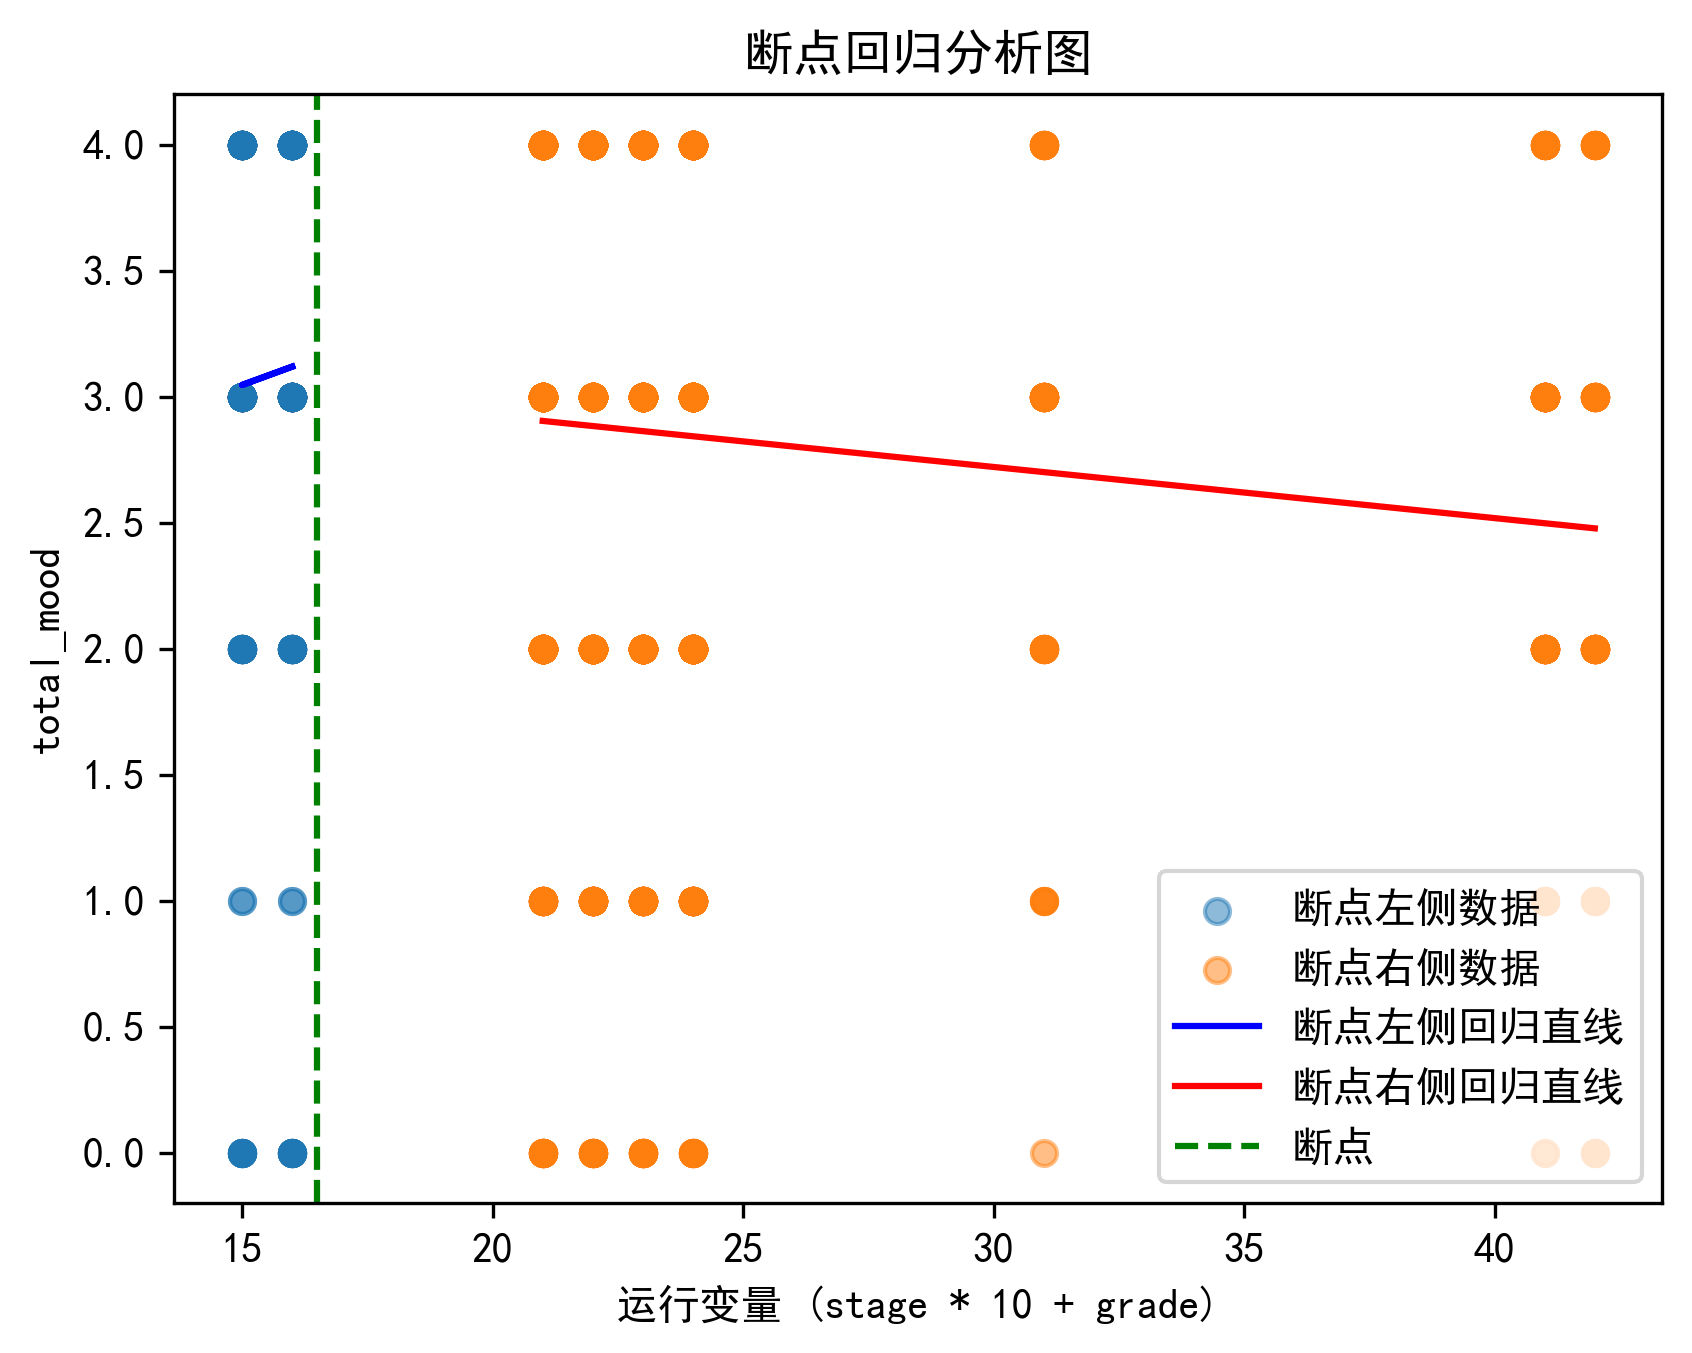

断点左侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00        0.03
total_mood                    0.03        1.00
断点右侧相关性矩阵：
                  running_variable  total_mood
running_variable               1.0        -0.1
total_mood                    -0.1         1.0


In [5]:
# 小升初
# 分开单独因变量
df['total_mood'] = df['moodgeneral']

# 删除 total_mood 列中含有缺失值的行
df = df.dropna(subset=['total_mood'])

# 创建一个断点变量，以 (1, 6) 和 (2, 1) 为断点
df['breakpoint'] = ((df['stage'] == 1) & (df['grade'] == 6)) | ((df['stage'] == 2) & (df['grade'] == 1))
df['running_variable'] = df['stage'] * 10 + df['grade']
threshold = 16.5  # 断点在 (1, 6) 和 (2, 1) 中间

# 划分断点两侧的数据
left_data = df[df['running_variable'] < threshold]
right_data = df[df['running_variable'] >= threshold]

# 分别对断点两侧的数据进行线性回归
X_left = left_data[['running_variable']]
y_left = left_data['total_mood']
model_left = LinearRegression()
model_left.fit(X_left, y_left)
y_pred_left = model_left.predict(X_left)

X_right = right_data[['running_variable']]
y_right = right_data['total_mood']
model_right = LinearRegression()
model_right.fit(X_right, y_right)
y_pred_right = model_right.predict(X_right)

# 计算回归分析指标
r2_left = r2_score(y_left, y_pred_left)
mse_left = mean_squared_error(y_left, y_pred_left)
r2_right = r2_score(y_right, y_pred_right)
mse_right = mean_squared_error(y_right, y_pred_right)

print('断点左侧决定系数 (R^2):', r2_left)
print('断点左侧均方误差 (MSE):', mse_left)
print('断点右侧决定系数 (R^2):', r2_right)
print('断点右侧均方误差 (MSE):', mse_right)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制回归分析图
plt.scatter(left_data['running_variable'], left_data['total_mood'], alpha=0.5, label='断点左侧数据')
plt.scatter(right_data['running_variable'], right_data['total_mood'], alpha=0.5, label='断点右侧数据')
plt.plot(left_data['running_variable'], y_pred_left, color='blue', label='断点左侧回归直线')
plt.plot(right_data['running_variable'], y_pred_right, color='red', label='断点右侧回归直线')
plt.axvline(x=threshold, color='green', linestyle='--', label='断点')
plt.xlabel('运行变量 (stage * 10 + grade)')
plt.ylabel('total_mood')
plt.title('断点回归分析图')
plt.legend()

# 显示图表
plt.show()

# 计算相关性矩阵（保留两位小数）
correlation_matrix_left = left_data[['running_variable', 'total_mood']].corr().round(2)
correlation_matrix_right = right_data[['running_variable', 'total_mood']].corr().round(2)
print('断点左侧相关性矩阵：')
print(correlation_matrix_left)
print('断点右侧相关性矩阵：')
print(correlation_matrix_right)

断点左侧决定系数 (R^2): 0.009117210534097087
断点左侧均方误差 (MSE): 4.252382753924755
断点右侧决定系数 (R^2): 0.02043734325997404
断点右侧均方误差 (MSE): 4.750160394335132


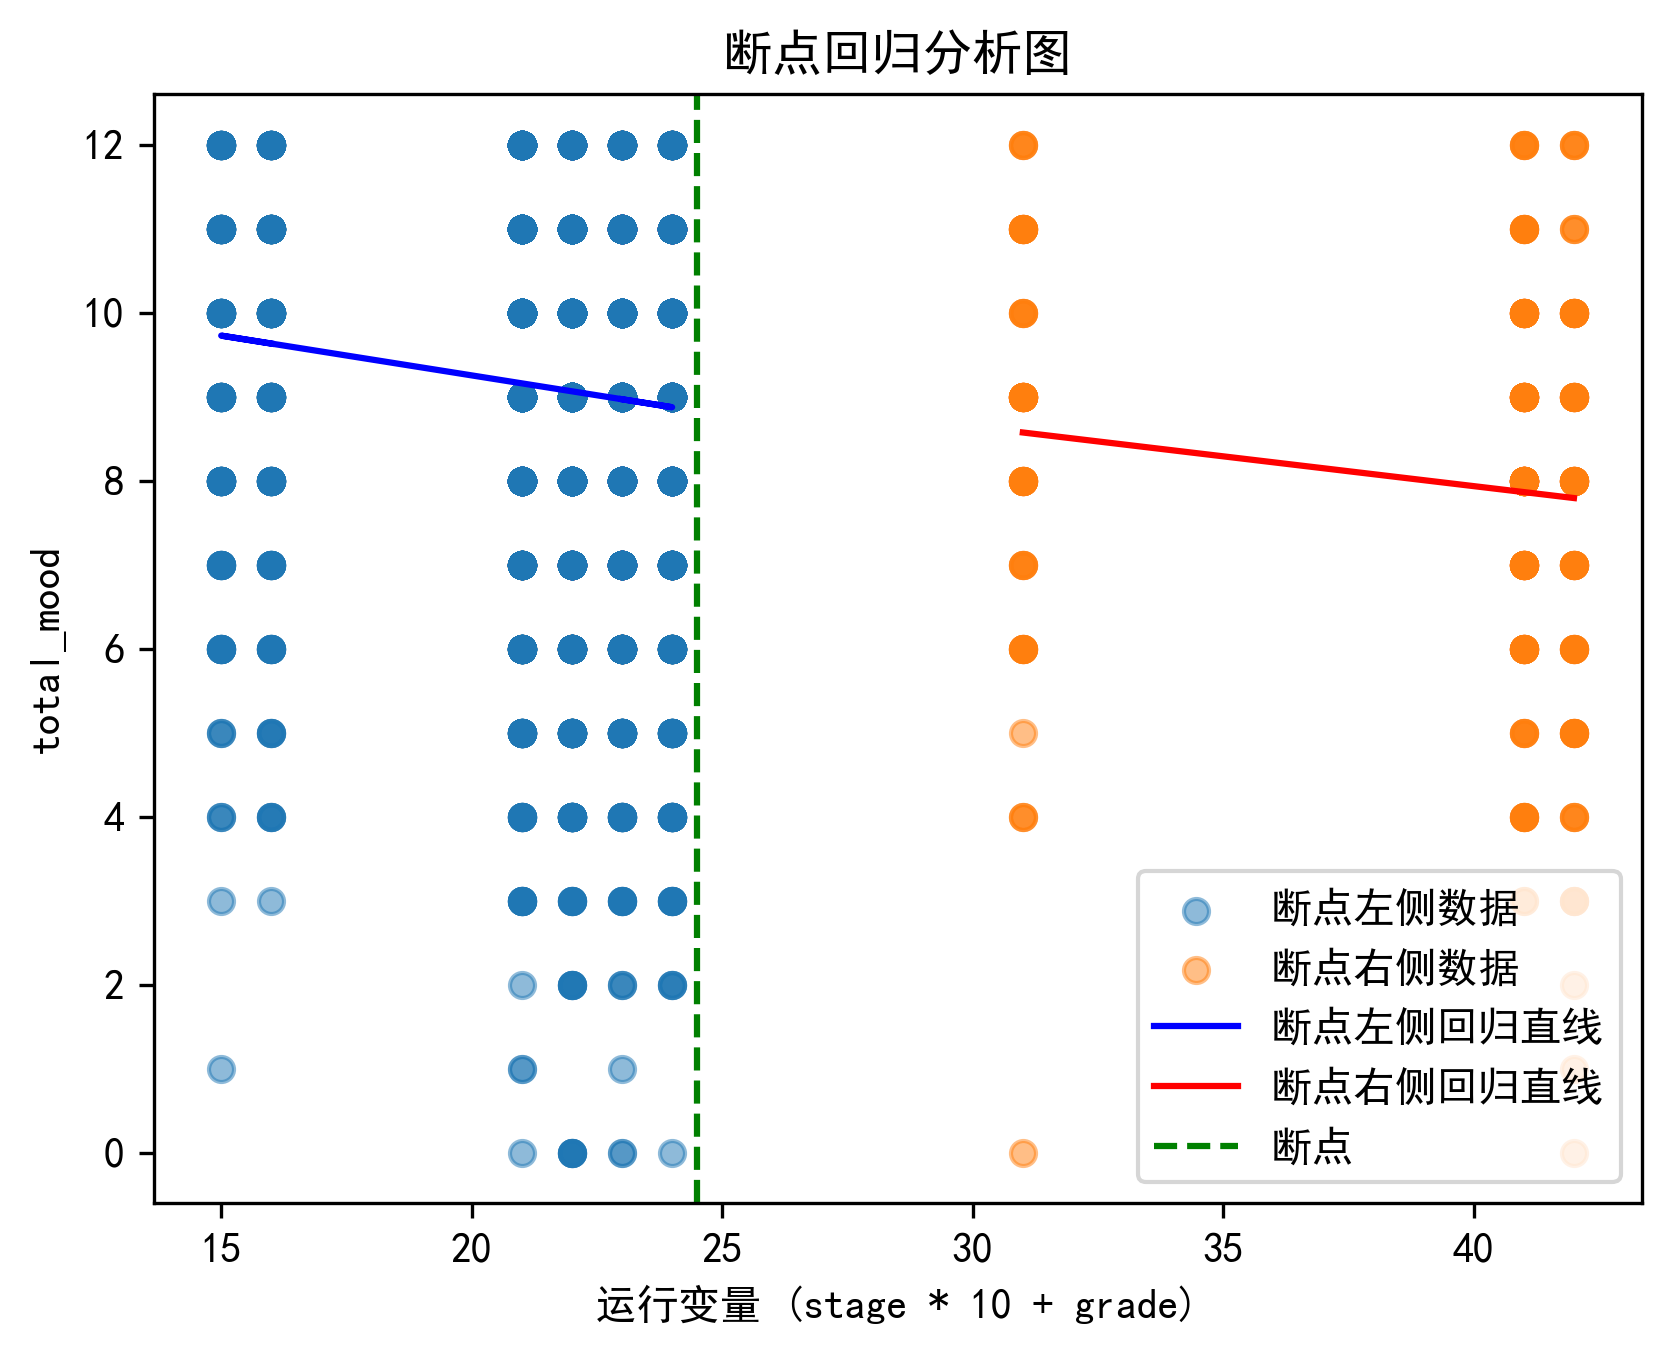

断点左侧相关性矩阵：
                  running_variable  total_mood
running_variable               1.0        -0.1
total_mood                    -0.1         1.0
断点右侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.14
total_mood                   -0.14        1.00


In [11]:


df = pd.read_csv("C:\\students_data.csv", encoding='Windows-1252')
# 计算因变量
df['total_mood'] = df['moodfun'] + df['moodalone'] + df['moodgeneral']

# 删除 total_mood 列中含有缺失值的行
df = df.dropna(subset=['total_mood'])

# 创建一个断点变量，以 (2, 4) 和 (3, 1) 为断点
df['breakpoint'] = ((df['stage'] == 2) & (df['grade'] == 4)) | ((df['stage'] == 3) & (df['grade'] == 1))
df['running_variable'] = df['stage'] * 10 + df['grade']
threshold = 24.5  # 断点在 (2, 4) 和 (3, 1) 中间

# 划分断点两侧的数据
left_data = df[df['running_variable'] < threshold]
right_data = df[df['running_variable'] >= threshold]

# 分别对断点两侧的数据进行线性回归
X_left = left_data[['running_variable']]
y_left = left_data['total_mood']
model_left = LinearRegression()
model_left.fit(X_left, y_left)
y_pred_left = model_left.predict(X_left)

X_right = right_data[['running_variable']]
y_right = right_data['total_mood']
model_right = LinearRegression()
model_right.fit(X_right, y_right)
y_pred_right = model_right.predict(X_right)

# 计算回归分析指标
r2_left = r2_score(y_left, y_pred_left)
mse_left = mean_squared_error(y_left, y_pred_left)
r2_right = r2_score(y_right, y_pred_right)
mse_right = mean_squared_error(y_right, y_pred_right)

print('断点左侧决定系数 (R^2):', r2_left)
print('断点左侧均方误差 (MSE):', mse_left)
print('断点右侧决定系数 (R^2):', r2_right)
print('断点右侧均方误差 (MSE):', mse_right)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制回归分析图
plt.scatter(left_data['running_variable'], left_data['total_mood'], alpha=0.5, label='断点左侧数据')
plt.scatter(right_data['running_variable'], right_data['total_mood'], alpha=0.5, label='断点右侧数据')
plt.plot(left_data['running_variable'], y_pred_left, color='blue', label='断点左侧回归直线')
plt.plot(right_data['running_variable'], y_pred_right, color='red', label='断点右侧回归直线')
plt.axvline(x=threshold, color='green', linestyle='--', label='断点')
plt.xlabel('运行变量 (stage * 10 + grade)')
plt.ylabel('total_mood')
plt.title('断点回归分析图')
plt.legend()

# 显示图表
plt.show()

# 计算相关性矩阵（保留两位小数）
correlation_matrix_left = left_data[['running_variable', 'total_mood']].corr().round(2)
correlation_matrix_right = right_data[['running_variable', 'total_mood']].corr().round(2)
print('断点左侧相关性矩阵：')
print(correlation_matrix_left)
print('断点右侧相关性矩阵：')
print(correlation_matrix_right)

断点左侧决定系数 (R^2): 0.011932341558521742
断点左侧均方误差 (MSE): 0.7958506208416418
断点右侧决定系数 (R^2): 0.020560900129591775
断点右侧均方误差 (MSE): 0.9185763131026966


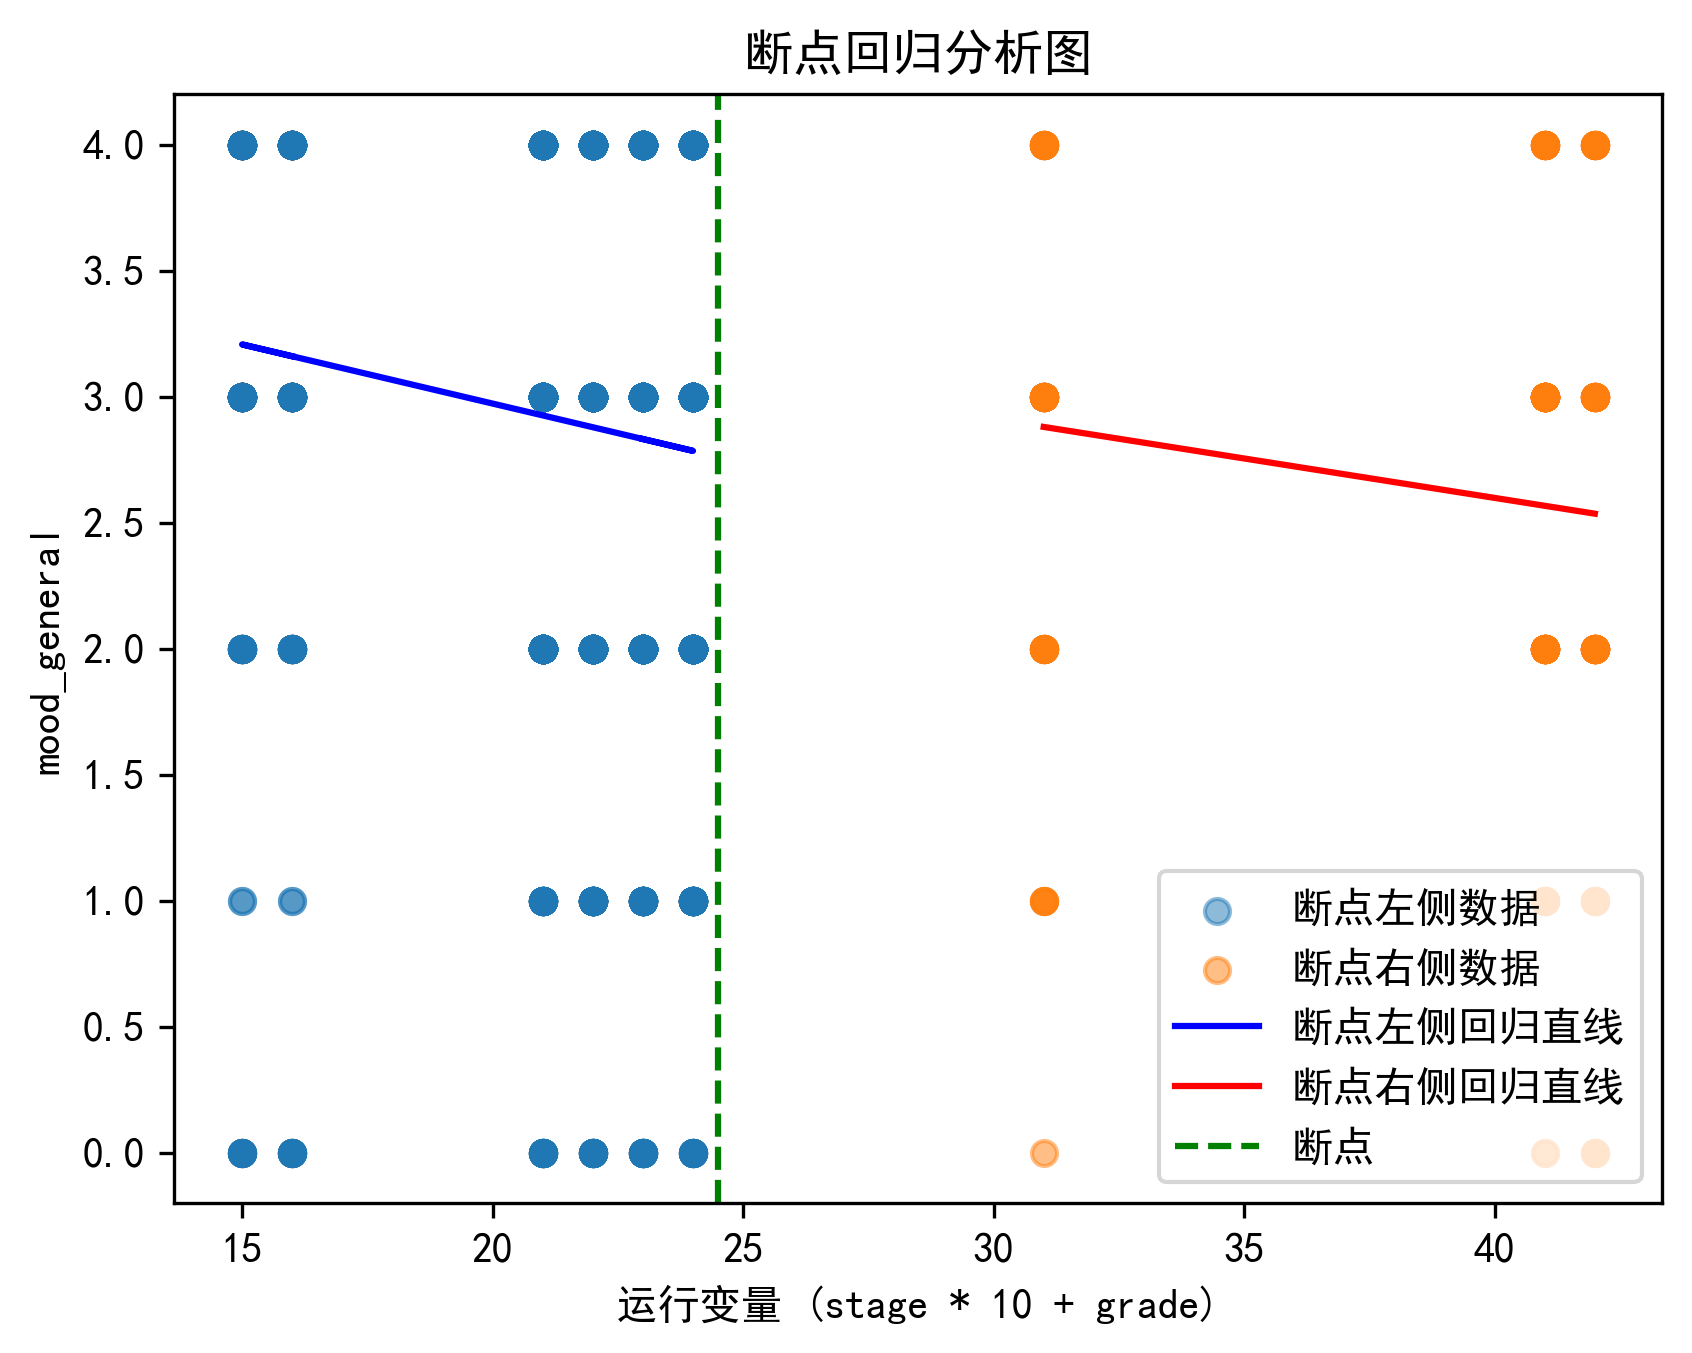

断点左侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.11
total_mood                   -0.11        1.00
断点右侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.14
total_mood                   -0.14        1.00


In [16]:
#接下来对三个情绪分开进行测试
# 计算因变量
df['total_mood'] = df['moodgeneral']

# 删除 total_mood 列中含有缺失值的行
df = df.dropna(subset=['total_mood'])

# 创建一个断点变量，以 (2, 4) 和 (3, 1) 为断点
df['breakpoint'] = ((df['stage'] == 2) & (df['grade'] == 4)) | ((df['stage'] == 3) & (df['grade'] == 1))
df['running_variable'] = df['stage'] * 10 + df['grade']
threshold = 24.5  # 断点在 (2, 4) 和 (3, 1) 中间

# 划分断点两侧的数据
left_data = df[df['running_variable'] < threshold]
right_data = df[df['running_variable'] >= threshold]

# 分别对断点两侧的数据进行线性回归
X_left = left_data[['running_variable']]
y_left = left_data['total_mood']
model_left = LinearRegression()
model_left.fit(X_left, y_left)
y_pred_left = model_left.predict(X_left)

X_right = right_data[['running_variable']]
y_right = right_data['total_mood']
model_right = LinearRegression()
model_right.fit(X_right, y_right)
y_pred_right = model_right.predict(X_right)

# 计算回归分析指标
r2_left = r2_score(y_left, y_pred_left)
mse_left = mean_squared_error(y_left, y_pred_left)
r2_right = r2_score(y_right, y_pred_right)
mse_right = mean_squared_error(y_right, y_pred_right)

print('断点左侧决定系数 (R^2):', r2_left)
print('断点左侧均方误差 (MSE):', mse_left)
print('断点右侧决定系数 (R^2):', r2_right)
print('断点右侧均方误差 (MSE):', mse_right)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制回归分析图
plt.scatter(left_data['running_variable'], left_data['total_mood'], alpha=0.5, label='断点左侧数据')
plt.scatter(right_data['running_variable'], right_data['total_mood'], alpha=0.5, label='断点右侧数据')
plt.plot(left_data['running_variable'], y_pred_left, color='blue', label='断点左侧回归直线')
plt.plot(right_data['running_variable'], y_pred_right, color='red', label='断点右侧回归直线')
plt.axvline(x=threshold, color='green', linestyle='--', label='断点')
plt.xlabel('运行变量 (stage * 10 + grade)')
plt.ylabel('mood_general')
plt.title('断点回归分析图')
plt.legend()

# 显示图表
plt.show()

correlation_matrix_left = left_data[['running_variable', 'total_mood']].corr().round(2)
correlation_matrix_right = right_data[['running_variable', 'total_mood']].corr().round(2)
print('断点左侧相关性矩阵：')
print(correlation_matrix_left)
print('断点右侧相关性矩阵：')
print(correlation_matrix_right)

断点左侧决定系数 (R^2): 0.0023936350001811935
断点左侧均方误差 (MSE): 1.0961187265629784
断点右侧决定系数 (R^2): 0.008923617046315169
断点右侧均方误差 (MSE): 0.9412191647653609


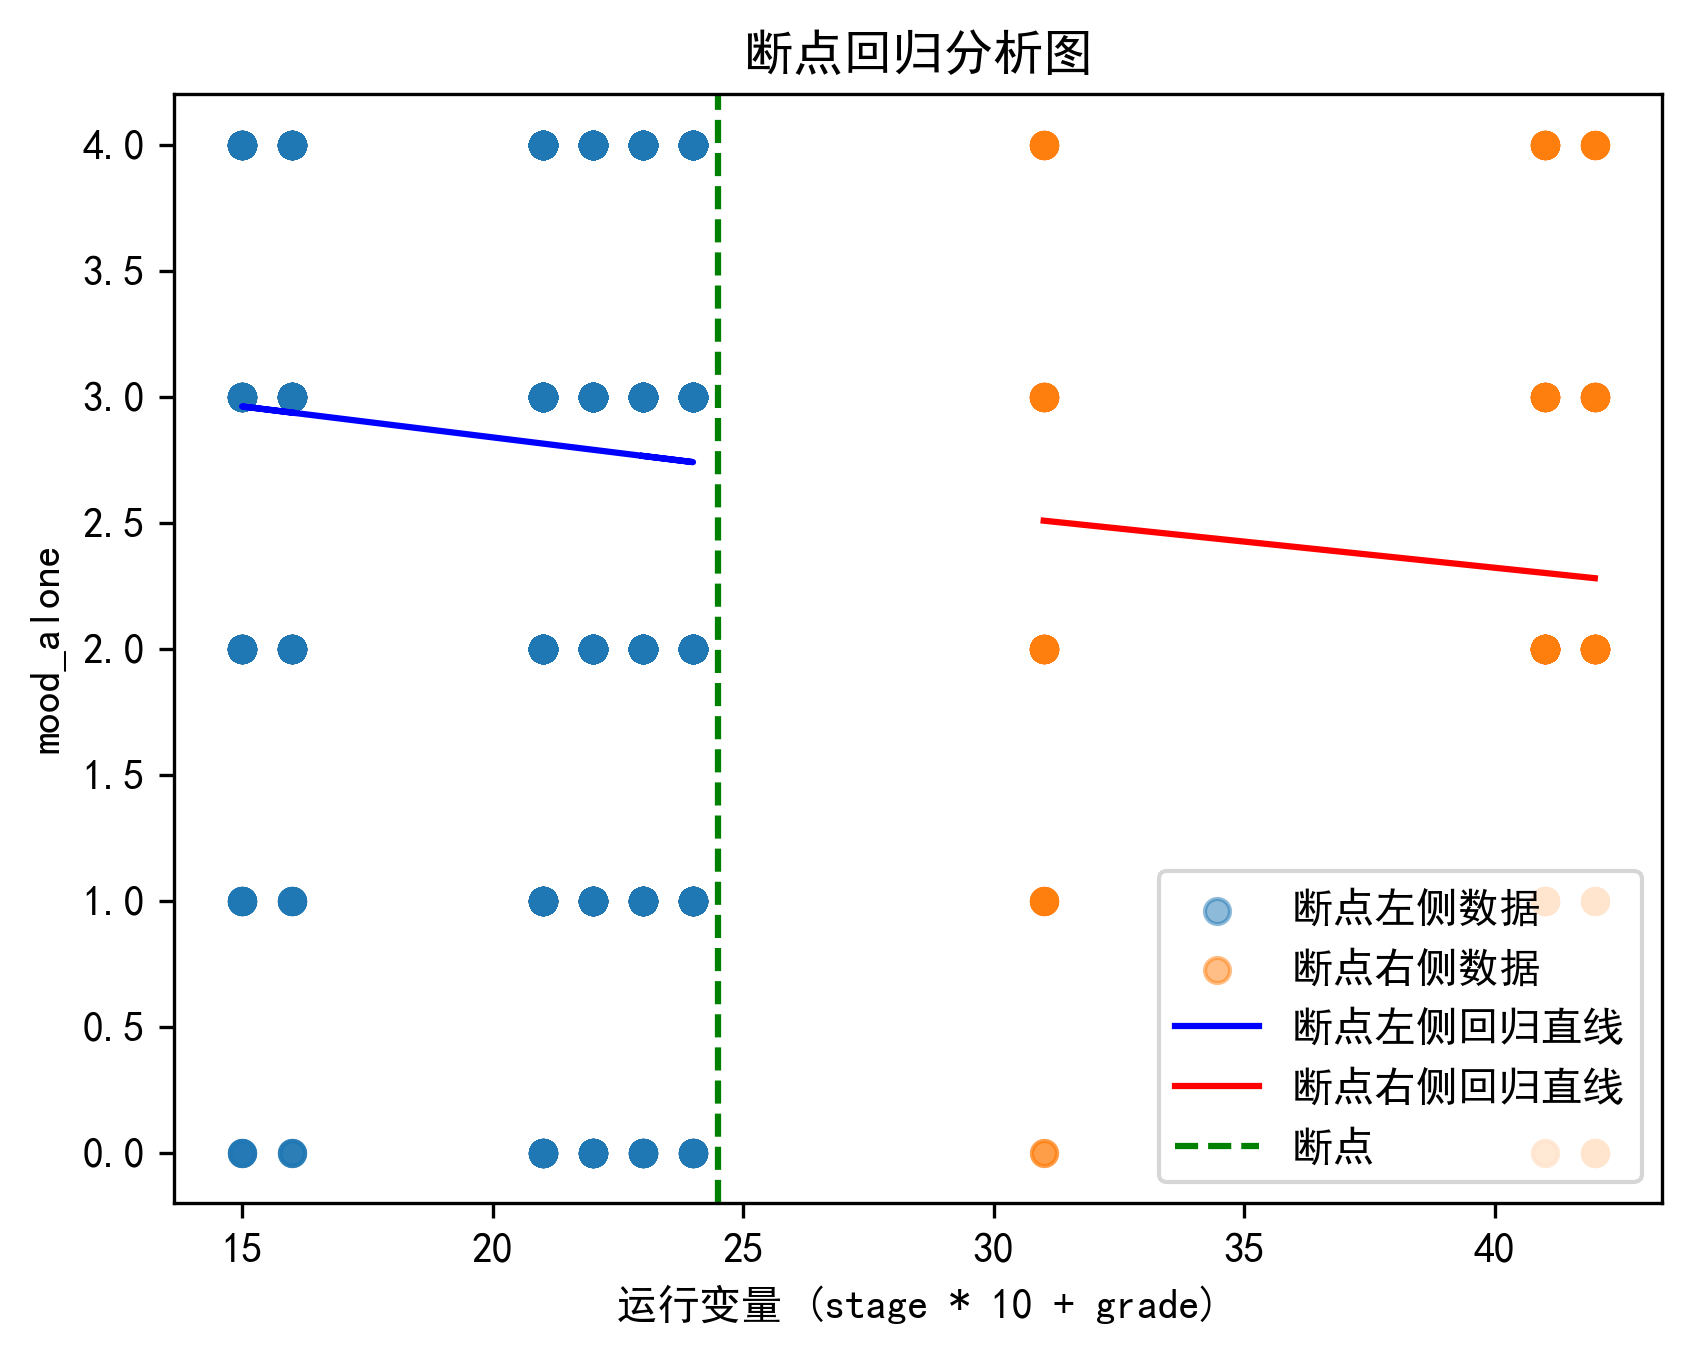

断点左侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.05
total_mood                   -0.05        1.00
断点右侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.09
total_mood                   -0.09        1.00


In [13]:
#接下来对三个情绪分开进行测试
# 计算因变量
df['total_mood'] = df['moodalone']

# 删除 total_mood 列中含有缺失值的行
df = df.dropna(subset=['total_mood'])

# 创建一个断点变量，以 (2, 4) 和 (3, 1) 为断点
df['breakpoint'] = ((df['stage'] == 2) & (df['grade'] == 4)) | ((df['stage'] == 3) & (df['grade'] == 1))
df['running_variable'] = df['stage'] * 10 + df['grade']
threshold = 24.5  # 断点在 (2, 4) 和 (3, 1) 中间

# 划分断点两侧的数据
left_data = df[df['running_variable'] < threshold]
right_data = df[df['running_variable'] >= threshold]

# 分别对断点两侧的数据进行线性回归
X_left = left_data[['running_variable']]
y_left = left_data['total_mood']
model_left = LinearRegression()
model_left.fit(X_left, y_left)
y_pred_left = model_left.predict(X_left)

X_right = right_data[['running_variable']]
y_right = right_data['total_mood']
model_right = LinearRegression()
model_right.fit(X_right, y_right)
y_pred_right = model_right.predict(X_right)

# 计算回归分析指标
r2_left = r2_score(y_left, y_pred_left)
mse_left = mean_squared_error(y_left, y_pred_left)
r2_right = r2_score(y_right, y_pred_right)
mse_right = mean_squared_error(y_right, y_pred_right)

print('断点左侧决定系数 (R^2):', r2_left)
print('断点左侧均方误差 (MSE):', mse_left)
print('断点右侧决定系数 (R^2):', r2_right)
print('断点右侧均方误差 (MSE):', mse_right)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制回归分析图
plt.scatter(left_data['running_variable'], left_data['total_mood'], alpha=0.5, label='断点左侧数据')
plt.scatter(right_data['running_variable'], right_data['total_mood'], alpha=0.5, label='断点右侧数据')
plt.plot(left_data['running_variable'], y_pred_left, color='blue', label='断点左侧回归直线')
plt.plot(right_data['running_variable'], y_pred_right, color='red', label='断点右侧回归直线')
plt.axvline(x=threshold, color='green', linestyle='--', label='断点')
plt.xlabel('运行变量 (stage * 10 + grade)')
plt.ylabel('mood_alone')
plt.title('断点回归分析图')
plt.legend()

# 显示图表
plt.show()

correlation_matrix_left = left_data[['running_variable', 'total_mood']].corr().round(2)
correlation_matrix_right = right_data[['running_variable', 'total_mood']].corr().round(2)
print('断点左侧相关性矩阵：')
print(correlation_matrix_left)
print('断点右侧相关性矩阵：')
print(correlation_matrix_right)

断点左侧决定系数 (R^2): 0.0036154203420928344
断点左侧均方误差 (MSE): 0.6478612591765819
断点右侧决定系数 (R^2): 0.00817408094399874
断点右侧均方误差 (MSE): 0.853899108299703


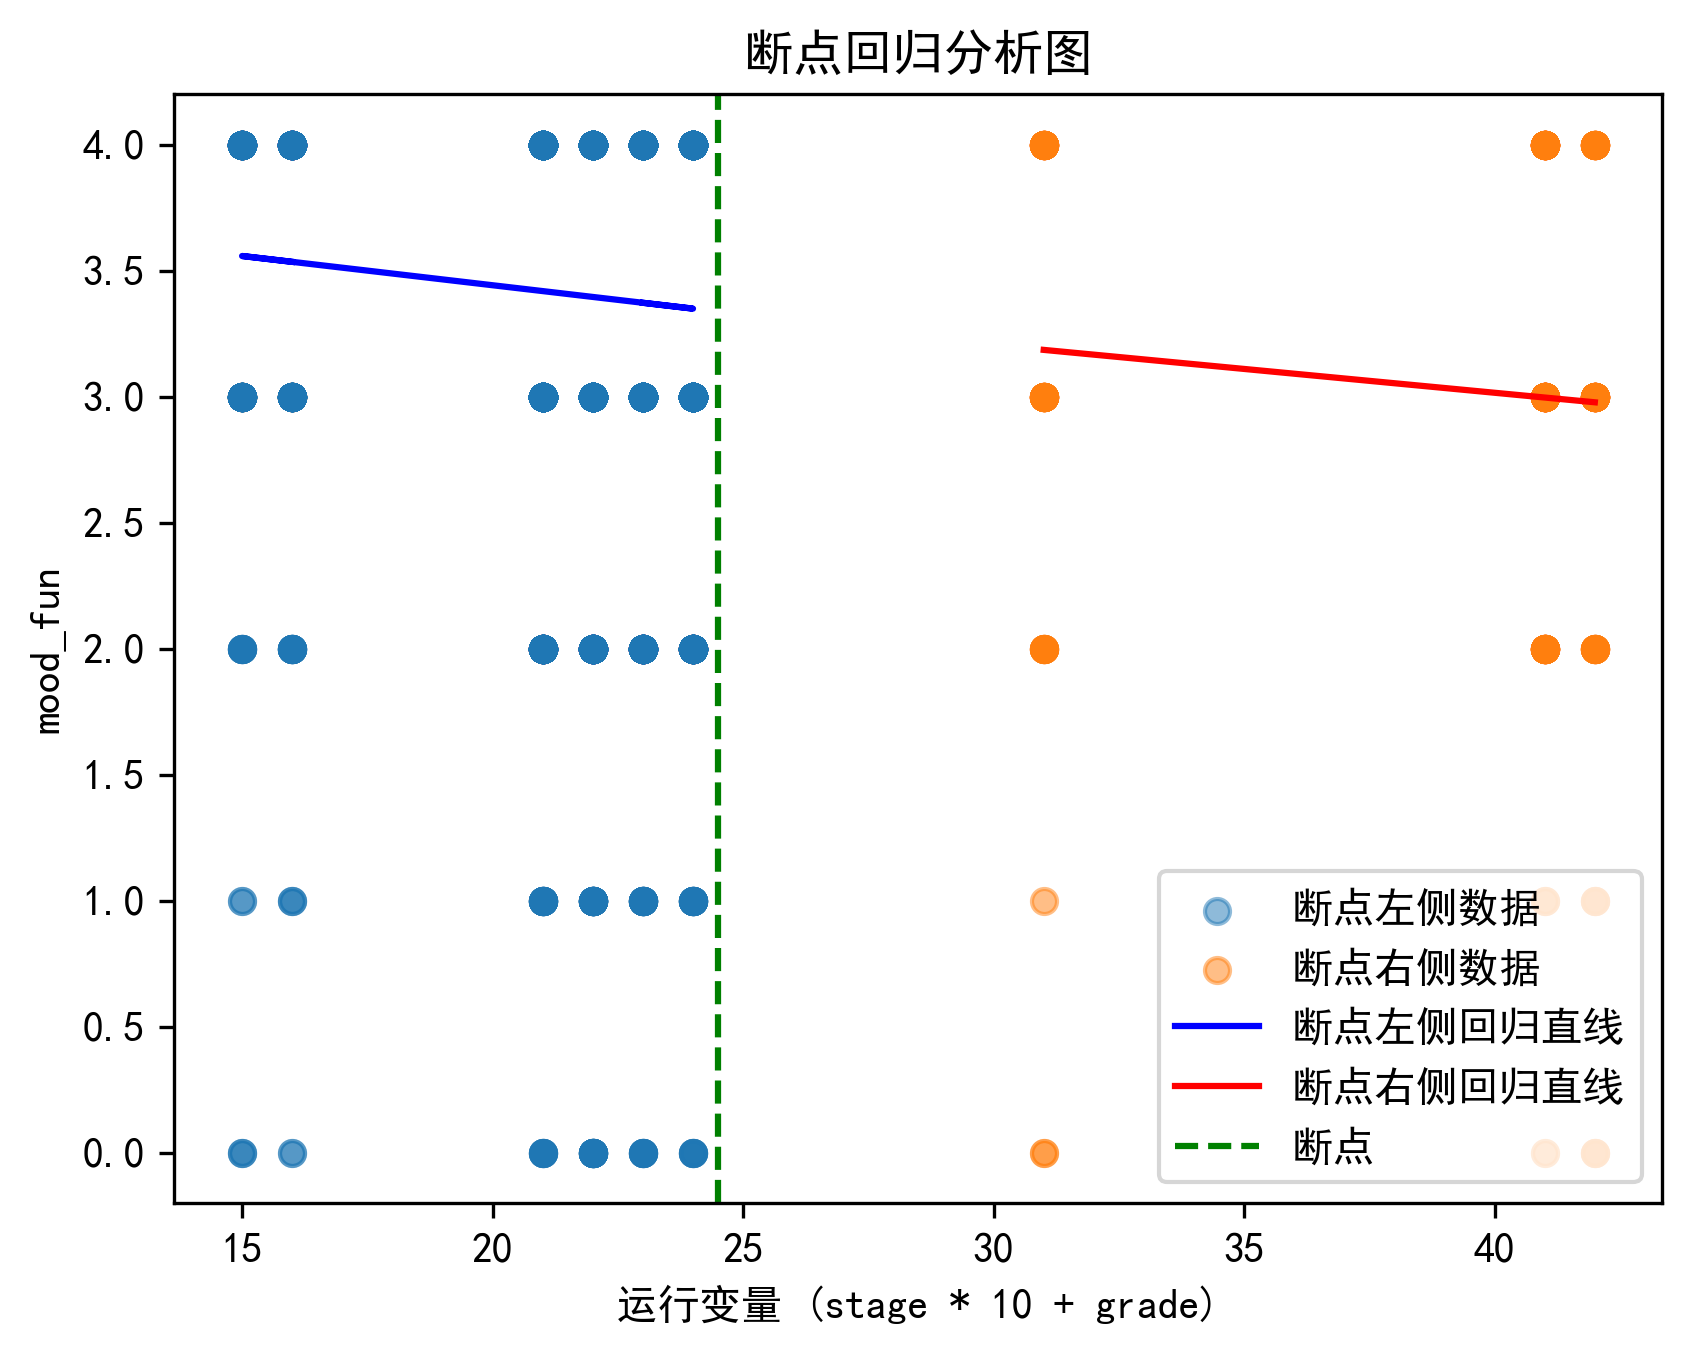

断点左侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.06
total_mood                   -0.06        1.00
断点右侧相关性矩阵：
                  running_variable  total_mood
running_variable              1.00       -0.09
total_mood                   -0.09        1.00


In [14]:
#接下来对三个情绪分开进行测试
# 计算因变量
df['total_mood'] = df['moodfun']

# 删除 total_mood 列中含有缺失值的行
df = df.dropna(subset=['total_mood'])

# 创建一个断点变量，以 (2, 4) 和 (3, 1) 为断点
df['breakpoint'] = ((df['stage'] == 2) & (df['grade'] == 4)) | ((df['stage'] == 3) & (df['grade'] == 1))
df['running_variable'] = df['stage'] * 10 + df['grade']
threshold = 24.5  # 断点在 (2, 4) 和 (3, 1) 中间

# 划分断点两侧的数据
left_data = df[df['running_variable'] < threshold]
right_data = df[df['running_variable'] >= threshold]

# 分别对断点两侧的数据进行线性回归
X_left = left_data[['running_variable']]
y_left = left_data['total_mood']
model_left = LinearRegression()
model_left.fit(X_left, y_left)
y_pred_left = model_left.predict(X_left)

X_right = right_data[['running_variable']]
y_right = right_data['total_mood']
model_right = LinearRegression()
model_right.fit(X_right, y_right)
y_pred_right = model_right.predict(X_right)

# 计算回归分析指标
r2_left = r2_score(y_left, y_pred_left)
mse_left = mean_squared_error(y_left, y_pred_left)
r2_right = r2_score(y_right, y_pred_right)
mse_right = mean_squared_error(y_right, y_pred_right)

print('断点左侧决定系数 (R^2):', r2_left)
print('断点左侧均方误差 (MSE):', mse_left)
print('断点右侧决定系数 (R^2):', r2_right)
print('断点右侧均方误差 (MSE):', mse_right)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制回归分析图
plt.scatter(left_data['running_variable'], left_data['total_mood'], alpha=0.5, label='断点左侧数据')
plt.scatter(right_data['running_variable'], right_data['total_mood'], alpha=0.5, label='断点右侧数据')
plt.plot(left_data['running_variable'], y_pred_left, color='blue', label='断点左侧回归直线')
plt.plot(right_data['running_variable'], y_pred_right, color='red', label='断点右侧回归直线')
plt.axvline(x=threshold, color='green', linestyle='--', label='断点')
plt.xlabel('运行变量 (stage * 10 + grade)')
plt.ylabel('mood_fun')
plt.title('断点回归分析图')
plt.legend()

# 显示图表
plt.show()

correlation_matrix_left = left_data[['running_variable', 'total_mood']].corr().round(2)
correlation_matrix_right = right_data[['running_variable', 'total_mood']].corr().round(2)
print('断点左侧相关性矩阵：')
print(correlation_matrix_left)
print('断点右侧相关性矩阵：')
print(correlation_matrix_right)